In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
%matplotlib inline 

In [2]:
data = pd.read_csv('WORLD UNIVERSITY RANKINGS.csv')
data.head()

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,2,7,96.7
2,3,Stanford University,USA,3,11,4,3,2,95.1
3,4,University of Cambridge,United Kingdom,1,3,25,4,10,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3


In [3]:
data['World Rank'].replace('-',0,inplace=True)
data['Institution'].replace('-',0,inplace=True)
data['Location'].replace('-',0,inplace=True)
data['National Rank'].replace('-',0,inplace=True)
data['Education Rank'].replace('-',0,inplace=True)
data['Employability Rank'].replace('-',0,inplace=True)
data['Faculty Rank'].replace('-',0,inplace=True)
data['Research Rank'].replace('-',0,inplace=True)
data['Score'].replace('-',0,inplace=True)

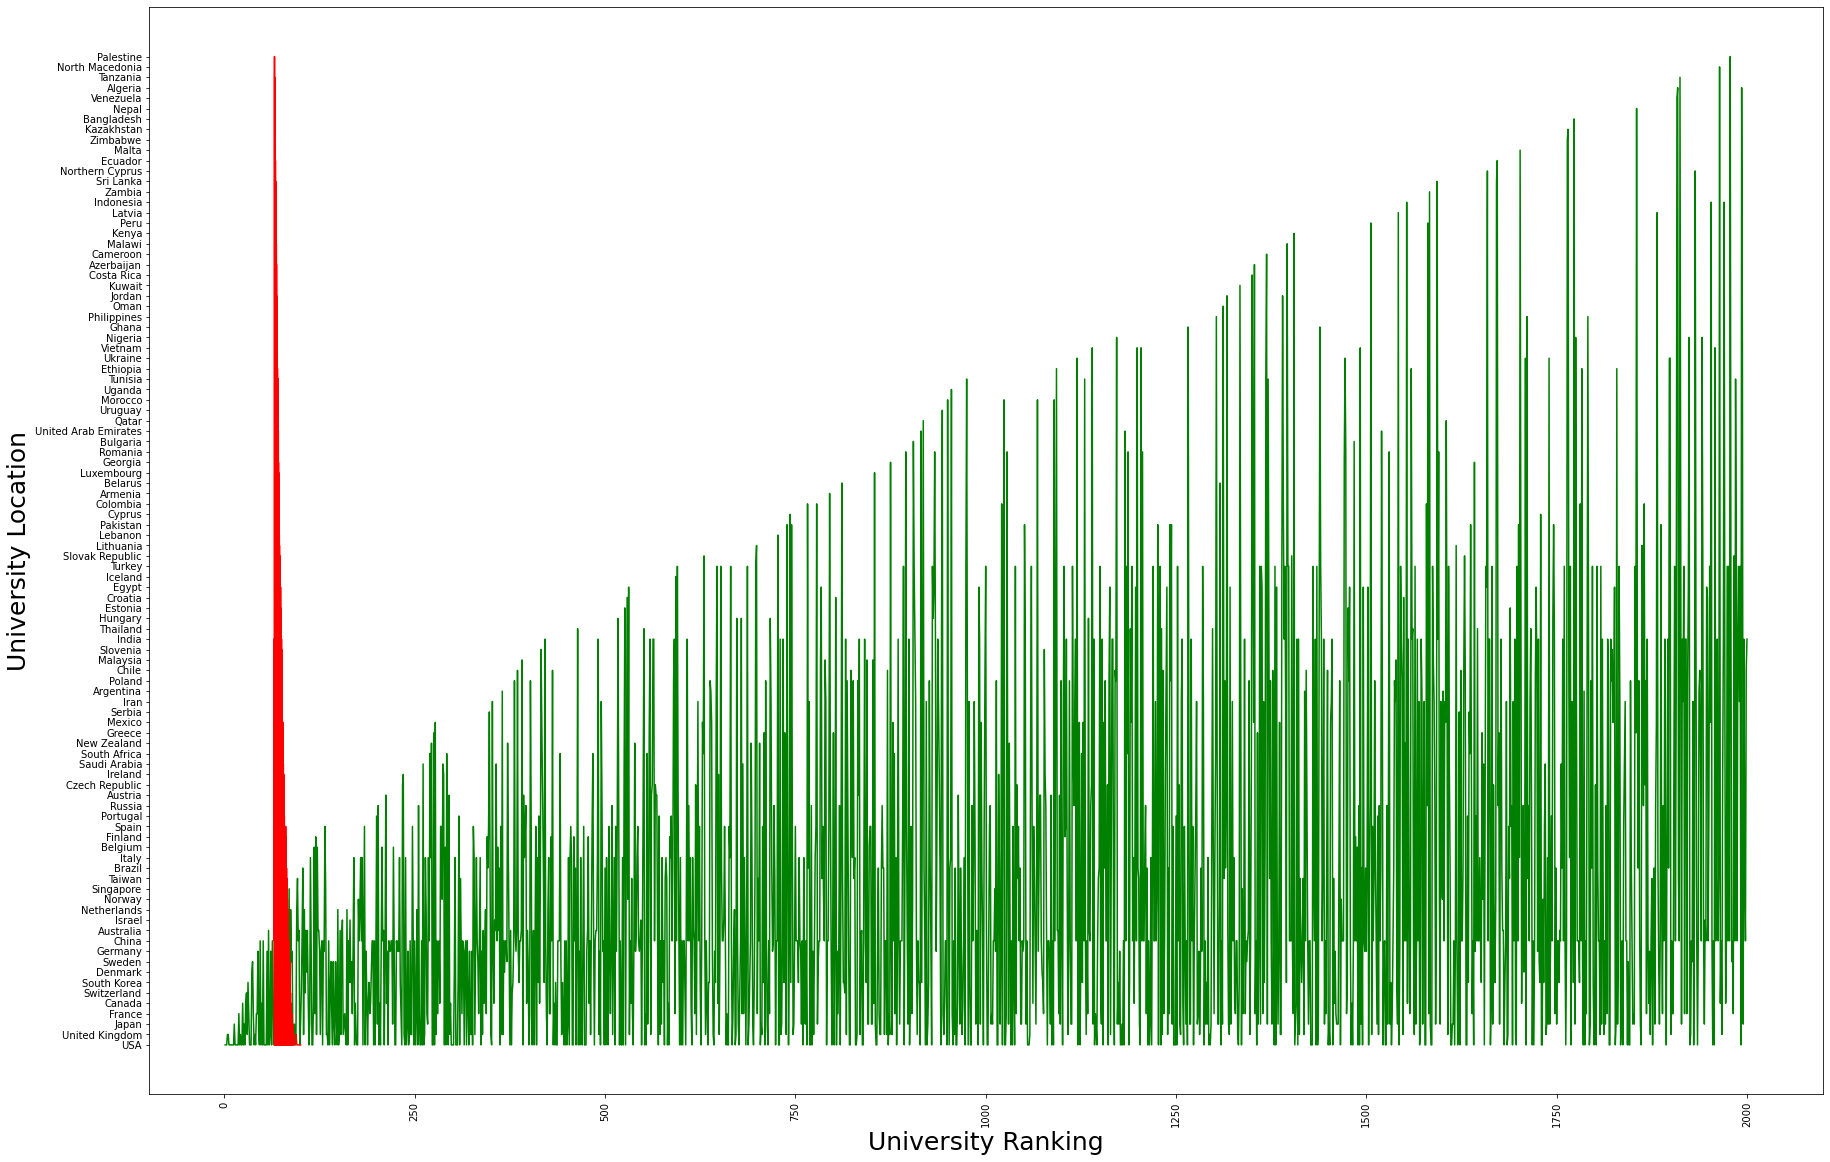

In [53]:
plt.figure(figsize=(30,20))
plt.plot(data.loc[:,"World Rank"], data.loc[:,"Location"], color='green')
plt.plot(data.loc[:,"Score"], data.loc[:,"Location"], color='red')
plt.xticks(rotation = 90)
plt.xlabel('University Ranking', fontsize=25)
plt.ylabel('University Location', fontsize=25)
plt.grid(linewidth=0)

In [5]:
inputs = data.drop(['World Rank'], axis='columns')

In [6]:
inputs.head()

,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,Harvard University,USA,1,1,1,1,1,100.0
1,Massachusetts Institute of Technology,USA,2,4,12,2,7,96.7
2,Stanford University,USA,3,11,4,3,2,95.1
3,University of Cambridge,United Kingdom,1,3,25,4,10,94.1
4,University of Oxford,United Kingdom,2,7,27,9,4,93.3


In [7]:
target = data['World Rank']
target.head()

0    1
1    2
2    3
3    4
4    5
Name: World Rank, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
inputs.head()

,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,Harvard University,USA,1,1,1,1,1,100.0
1,Massachusetts Institute of Technology,USA,2,4,12,2,7,96.7
2,Stanford University,USA,3,11,4,3,2,95.1
3,University of Cambridge,United Kingdom,1,3,25,4,10,94.1
4,University of Oxford,United Kingdom,2,7,27,9,4,93.3


In [10]:
le_Institution = LabelEncoder()
le_Location = LabelEncoder()

In [11]:
inputs['Institutioncoded'] = le_Institution.fit_transform(inputs['Institution'])
inputs['Locationcoded'] = le_Institution.fit_transform(inputs['Location'])

In [12]:
inputs.head()

,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score,Institutioncoded,Locationcoded
0,Harvard University,USA,1,1,1,1,1,100.0,473,86
1,Massachusetts Institute of Technology,USA,2,4,12,2,7,96.7,797,86
2,Stanford University,USA,3,11,4,3,2,95.1,1221,86
3,University of Cambridge,United Kingdom,1,3,25,4,10,94.1,1414,90
4,University of Oxford,United Kingdom,2,7,27,9,4,93.3,1658,90


In [13]:
len(inputs)

2000

In [14]:
inputs_coded = inputs.drop(['Institution', 'Location'], axis='columns')

In [15]:
inputs_coded

,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score,Institutioncoded,Locationcoded
0,1,1,1,1,1,100.0,473,86
1,2,4,12,2,7,96.7,797,86
2,3,11,4,3,2,95.1,1221,86
3,1,3,25,4,10,94.1,1414,90
4,2,7,27,9,4,93.3,1658,90
...,...,...,...,...,...,...,...,...
1995,66,0,0,0,1921,65.8,113,33
1996,56,0,0,0,1923,65.7,346,9
1997,302,0,797,0,1948,65.7,637,14
1998,16,0,0,0,1925,65.7,1763,13


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(inputs_coded, target, test_size=.2 )

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
model.score(X_test, y_test)

0.8847661079022979